# Milestone 2 - Diaper Manufacturing

## Nourhan El Zarif

## Read and Merge Data

'File2' contains the target data, and the datetime indices for the data. The data is stored in 'file'. 

In [1]:
import pandas as pd
import numpy as np

file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data'
file2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data'

In [2]:
#this is a temporary dataframe
temp = pd.read_csv(file2, header = None, sep = ' ')
#temp.head()

First, we will create a pandas series that holds the target data (pass/fail).

In [3]:
target = pd.Series(data = temp[0])
target.index = pd.to_datetime(temp[1])

target = target.astype('category')
target.cat.codes

# Where –1 corresponds to a pass and 1 corresponds to a fail 
target.value_counts()

-1    1463
 1     104
Name: 0, dtype: int64

The target value counts show us there are many passing instances, and there is a minority of failing instances. 

Next, we will create a pandas dataframe that contains all the features.

In [4]:
data = pd.read_csv(file, header = None, sep = ' ')
#data.head()

data['DateTime'] = pd.to_datetime(temp[1])
data.set_index('DateTime', inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
DateTime,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [5]:
data.shape

(1567, 590)

The data has 590 attributes. Large numbers of attributes can reduce the accurecy of the machine learning model and increase the complexity. The number of attributes should be reevaluated.

## Clean and Prepare Data

### Replace NaN values 

To avoid loosing too many data points, we will not drop any rows with NaN values. Instead, all NaNs will be replaced with the column mean value.

In [6]:
data = data.fillna(data.mean())
data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
DateTime,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.005396,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.006000,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.014800,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.004400,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.005396,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200


### Split Train and Test Data

We will split the dataset into training and testing data. 

In [7]:
from sklearn.model_selection import train_test_split

#Will split the data into 85% test and 15% train
testFrac = 0.15
train, test, target_train, target_test = train_test_split(data, target, test_size = testFrac, random_state = 10)

## Feature Selection

The excessive number of features could lead to a decrease in model accurecy, and increase incomplexity. To address this issue, we will test reducing features. 

### Reducing features

In [8]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha = 0.5)
clf.fit(data, target)

print(clf.coef_)

print(clf.intercept_)

[-4.18867502e-06 -1.04108804e-05 -0.00000000e+00 -1.63939506e-05
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.03369415e-05 -3.10331626e-05 -1.93762222e-06
 -4.73892095e-07 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000

In [9]:
lasso = []

for val in range(len(clf.coef_)):
    if (clf.coef_[val] != 0):
        lasso.append(data.columns[val])
        
print(lasso)

[0, 1, 3, 21, 22, 23, 24, 67, 88, 90, 137, 140, 158, 159, 160, 161, 162, 225, 296, 297, 418, 419, 423, 433, 468, 482, 483, 484, 485, 486, 487, 488, 489, 499, 500, 510, 511, 521, 572, 581]


In [10]:
len(lasso)

40

After shrinking features using lasso, the number of attributes has been reduced to 40. Now testing and training data will be modified to the reduced number of features.

In [11]:
reduced_train = train[lasso]
reduced_train.shape

(1331, 40)

In [12]:
reduced_test = test[lasso]
reduced_test.shape

(236, 40)

## Feature Selection and SMOTE

Now, we will combine feature selection and SMOTE.

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10)

reduced_train_res, target_train_res =sm.fit_sample(reduced_train, target_train)

target_train_res.value_counts()

 1    1242
-1    1242
Name: 0, dtype: int64

In [14]:
reduced_train_res.shape

(2484, 40)

## ROC Helper function

In [20]:
from sklearn.metrics import *
from matplotlib import pyplot as plt
import matplotlib

#function for creating and plotting ROC curve
def createROC(data, probabilities, title):
    fpr, tpr, th = roc_curve(data, probabilities)
    AUC = auc(fpr, tpr)
    
    plt.rcParams["figure.figsize"] = [8, 8] # Square
    font = {'family' : 'normal', 'weight' : 'bold', 'size' : 18}
    matplotlib.rc('font', **font)
    plt.figure()
    plt.title(title)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
    plt.legend(loc="lower right")
    plt.show()
    
    print('True Positive Rate: ' + str(tpr))
    print('False Positive Rate: ' + str(fpr))

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5, random_state = 1)
clf_dt.fit(reduced_train_res, target_train_res)

dt_pred = clf_dt.predict(reduced_test)

In [16]:
#using libraries to collect model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Decision Tree accuracy is : {}%".format(accuracy_score(target_test, dt_pred)*100))
print("Decision Tree precision is : {}%".format(precision_score(target_test, dt_pred)*100))
print("Decision Tree recall is : {}%".format(recall_score(target_test, dt_pred)*100))

Decision Tree accuracy is : 63.559322033898304%
Decision Tree precision is : 7.228915662650602%
Decision Tree recall is : 40.0%


C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


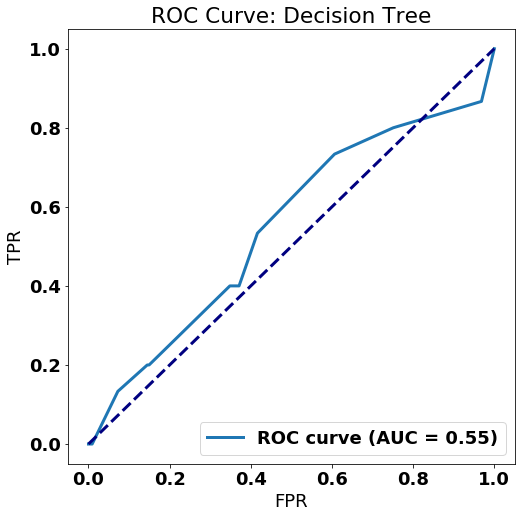

True Positive Rate: [0.         0.         0.         0.13333333 0.2        0.2
 0.4        0.4        0.4        0.53333333 0.6        0.73333333
 0.8        0.86666667 1.        ]
False Positive Rate: [0.         0.00452489 0.00904977 0.07239819 0.14479638 0.14932127
 0.34841629 0.35294118 0.37104072 0.41628959 0.47963801 0.60633484
 0.75113122 0.96832579 1.        ]


In [21]:
#Creating Decision Tree ROC curve
prob_dt = clf_dt.predict_proba(reduced_test)
createROC(target_test, prob_dt[:,1], 'ROC Curve: Decision Tree')

The decision tree classifier has an accurecy of 64%, precision of 7%, and recall of 40%. The decision tree returned an ROC curve with an AUC of 0.55.

# Ensemble Model

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators = 100, max_depth = 12, min_samples_leaf = 4, verbose = 0, random_state = 1)
clf_rf.fit(reduced_train_res, target_train_res)

rf_pred = clf_rf.predict(reduced_test)

In [18]:
print("Random Forest accuracy is : {}%".format(accuracy_score(target_test, rf_pred)*100))
print("Random Forest precision is : {}%".format(precision_score(target_test, rf_pred)*100))
print("Random Forest recall is : {}%".format(recall_score(target_test, rf_pred)*100))

Random Forest accuracy is : 90.67796610169492%
Random Forest precision is : 11.11111111111111%
Random Forest recall is : 6.666666666666667%


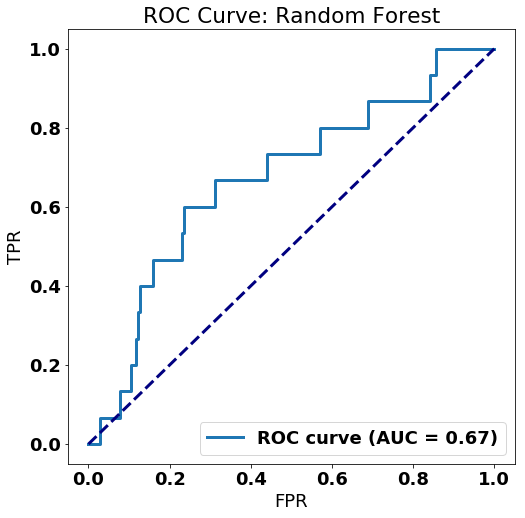

True Positive Rate: [0.         0.         0.         0.06666667 0.06666667 0.13333333
 0.13333333 0.2        0.2        0.26666667 0.26666667 0.33333333
 0.33333333 0.4        0.4        0.46666667 0.46666667 0.53333333
 0.53333333 0.6        0.6        0.66666667 0.66666667 0.73333333
 0.73333333 0.8        0.8        0.86666667 0.86666667 0.93333333
 0.93333333 1.         1.        ]
False Positive Rate: [0.         0.00452489 0.02714932 0.02714932 0.07692308 0.07692308
 0.1040724  0.1040724  0.11764706 0.11764706 0.12217195 0.12217195
 0.12669683 0.12669683 0.15837104 0.15837104 0.23076923 0.23076923
 0.23529412 0.23529412 0.31221719 0.31221719 0.43891403 0.43891403
 0.57013575 0.57013575 0.68778281 0.68778281 0.84162896 0.84162896
 0.85520362 0.85520362 1.        ]


In [22]:
#Creating Random Forest ROC curve
prob_rf = clf_rf.predict_proba(reduced_test)
createROC(target_test, prob_rf[:,1], 'ROC Curve: Random Forest')

The random forest classifier has an accurecy of 91%, precision of 11%, and recall of 7%. The random forest returned an ROC curve with an AUC of 0.67. The random forst had an improved performace over the decision tree in two of the three metrics.

# SVM

In [19]:
from sklearn import svm, metrics
from sklearn.metrics import classification_report

cost = 0.9
gamma = 5


for k in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(gamma=gamma, kernel=k, C=cost).fit(reduced_train_res, target_train_res)
    clf.predict(reduced_test)
    print(k)
    print(classification_report(clf.predict(reduced_test), target_test))

linear
              precision    recall  f1-score   support

          -1       0.67      0.96      0.79       155
           1       0.60      0.11      0.19        81

    accuracy                           0.67       236
   macro avg       0.64      0.54      0.49       236
weighted avg       0.65      0.67      0.58       236

rbf
              precision    recall  f1-score   support

          -1       1.00      0.94      0.97       236
           1       0.00      0.00      0.00         0

    accuracy                           0.94       236
   macro avg       0.50      0.47      0.48       236
weighted avg       1.00      0.94      0.97       236



C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


poly
              precision    recall  f1-score   support

          -1       0.86      0.94      0.90       203
           1       0.13      0.06      0.08        33

    accuracy                           0.81       236
   macro avg       0.50      0.50      0.49       236
weighted avg       0.76      0.81      0.78       236



The SVM classifier with the linear kernal has an accurecy of 67%, precision of 60%, recall of 11%, and f1 score of 19%.
The SVM classifier with the rbf kernal has an accurecy of 94%, precision of 0%, recall of 0%, and f1 score of 0%. The rbf model did not guess a single instance of 1.
The SVM classifier with the poly kernal has an accurecy of 81%, precision of 13%, recall of 6%, and f1 score of 8%.

While the rbf kernal has the highest accuracy, it does not detect any of the failures, making it not useful for its purpose detecting a minority error. The SVM classifier with the linear kernal has the best performance.

# Model Evaluation

The decision tree classifier has an accurecy of 64%, precision of 7%, and recall of 40%. The decision tree returned an ROC curve with an AUC of 0.55.

The random forest classifier has an accurecy of 91%, precision of 11%, and recall of 7%. The random forest returned an ROC curve with an AUC of 0.67. The random forst had an improved performace over the decision tree in two of the three metrics.

The SVM classifier with the linear kernal has the best performance.The SVM classifier with the linear kernal has an accurecy of 67%, precision of 60%, recall of 11%, and f1 score of 19%.

Of all the models, The decision tree classifier is the best for detecting the minority fault. It has the highest classifier recall metric. Overall, it has the lowest accuracy, but other models fail to detect faults.